In [11]:
from IPython.display import clear_output
import rebound
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
sim = rebound.Simulation()
#sim.units = ('AU', 'yr', 'Msun')
sim.add("Sun")
sim.add("Jupiter")
print(sim.particles[0])
        

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
<rebound.particle.Particle object at 0x7f6ea53aa4c0, m=0.9999999999950272 x=-0.008647339146912136 y=0.003173449379668766 z=0.0001760233652804739 vx=-0.00018232701132305543 vy=-0.0004933127082696685 vz=8.217828868307602e-06>


In [12]:
sim = rebound.Simulation()
#sim.units = ('AU', 'yr', 'Msun')
sim.add(m=1)
sim.add(m=0.0009547919099366768, x=4.700873257350307, y=-1.638871658756794, z=-0.09837100227914734, vx=0.1391574941369194, vy=0.4348006080824522, vz=-0.004917193679728236)
sim.move_to_com()
sim.integrator = "whfast"
sim.dt = .01

exit_max_distance = 10
a_list = []
rings = 200
as_per_ring = 4
for i in range (rings):
    for j in range (as_per_ring):
        # create sim with sun and jupiter
        
        clear_output(wait=True)
        print(i/rings)

        # create astroid
        mass = 1e-29
        radius = 2.400+0.001*i
        # res on 2.502

        omega =(2*np.pi)/as_per_ring*i
        ecc = 0.2*random.random()

        sim.add(m=mass,a=radius,omega=omega, e=ecc)
        for years in range(1000):

            try:
                sim.integrate(years*2.*np.pi)  
                a_list.append(sim.particles[2].a)
                # delete particle if it escaped the system
            except rebound.Escape as error:
                print(error)
                for j in range(sim.N):
                    p = sim.particles[j]
                    d2 = p.x*p.x + p.y*p.y + p.z*p.z
                    if d2>sim.exit_max_distance**2:
                        index=j # cache index rather than remove here since our loop would go beyond end of particles array

            #sim.integrate(years*2*np.pi)
            
        sim.remove(2)
        


0.01


KeyboardInterrupt: 

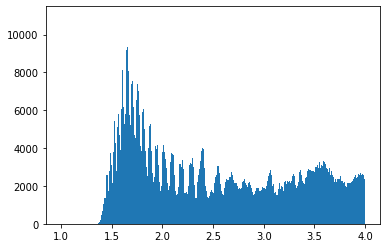

In [10]:
plt.hist(a_list,bins=1000,range=(1,4))
plt.show()